In [1]:
###Import libraries
import numpy as np
import matplotlib.pyplot as plt
import xarray as xr
import cartopy.crs as ccrs
import cartopy.feature as cfeature
from parcels import FieldSet, ParticleSet, JITParticle, AdvectionRK4, plotTrajectoriesFile, ScipyParticle
from datetime import timedelta
import math
import cartopy
import cmocean

In [2]:
###CREATE grid (1/4 deg)
longitudes = np.arange(-90,-10,1/4)
latitudes = np.arange(-10,90,1/4)
grid = np.ones([len(latitudes),len(longitudes)])

In [3]:
###Create fieldsets
U_val = -1/(24*3.6) #m/s
V_val = -1/(24*3.6) #m/s

##Fieldset 1
U = U_val*grid
V = 0*grid
data = {'U': U, 'V': V}
dimensions = {'lon': longitudes, 'lat': latitudes}
fieldset_1 = FieldSet.from_data(data, dimensions, mesh = "spherical")

##Fieldset 2
U = 0*grid
V = V_val*grid
data = {'U': U, 'V': V}
dimensions = {'lon': longitudes, 'lat': latitudes}
fieldset_2 = FieldSet.from_data(data, dimensions, mesh = "spherical")

In [4]:
###Create particleset
lon_list = []
lat_list = []
for lon in range(-45,-39):
    for lat in range(-9,89):
        lon_list.append(lon)
        lat_list.append(lat)

pset_1 = ParticleSet.from_list(fieldset=fieldset_1,   # the fields on which the particles are advected
                             pclass=JITParticle,  # the type of particles (JITParticle or ScipyParticle)
                             lon=lon_list,    # a vector of release longitudes 
                             lat=lat_list)    # a vector of release latitudes

pset_2 = ParticleSet.from_list(fieldset=fieldset_2,   # the fields on which the particles are advected
                             pclass=JITParticle,  # the type of particles (JITParticle or ScipyParticle)
                             lon=lon_list,    # a vector of release longitudes 
                             lat=lat_list)    # a vector of release latitudes

In [42]:
###Execution of particleset
def run_1_1():
    T = 2 #days
    RK4_dt = 1 #minutes
    output_dt = 24 #hours
    output_file = pset_1.ParticleFile(name="Output_1_1.zarr", outputdt=timedelta(hours=output_dt)) # the file name and the time step of the outputs
    pset_1.execute(AdvectionRK4,                 # the kernel (which defines how particles move)
                 runtime=timedelta(days=T),    # the total length of the run
                 dt=timedelta(minutes=RK4_dt),      # the timestep of the kernel
                 output_file=output_file)
    
    return

def run_1_5():
    T = 2 #days
    RK4_dt = 5 #minutes
    output_dt = 24 #hours
    output_file = pset_1.ParticleFile(name="Output_1_5.zarr", outputdt=timedelta(hours=output_dt)) # the file name and the time step of the outputs
    pset_1.execute(AdvectionRK4,                 # the kernel (which defines how particles move)
                 runtime=timedelta(days=T),    # the total length of the run
                 dt=timedelta(minutes=RK4_dt),      # the timestep of the kernel
                 output_file=output_file)
    
    return

def run_1_30():
    T = 2 #days
    RK4_dt = 30 #minutes
    output_dt = 24 #hours
    output_file = pset_1.ParticleFile(name="Output_1_30.zarr", outputdt=timedelta(hours=output_dt)) # the file name and the time step of the outputs
    pset_1.execute(AdvectionRK4,                 # the kernel (which defines how particles move)
                 runtime=timedelta(days=T),    # the total length of the run
                 dt=timedelta(minutes=RK4_dt),      # the timestep of the kernel
                 output_file=output_file)
    
    return

def run_2_1():
    T = 2 #days
    RK4_dt = 1 #minutes
    output_dt = 24 #hours
    output_file = pset_2.ParticleFile(name="Output_2_1.zarr", outputdt=timedelta(hours=output_dt)) # the file name and the time step of the outputs
    pset_2.execute(AdvectionRK4,                 # the kernel (which defines how particles move)
                 runtime=timedelta(days=T),    # the total length of the run
                 dt=timedelta(minutes=RK4_dt),      # the timestep of the kernel
                 output_file=output_file)
    
    return

def run_2_5():
    T = 2 #days
    RK4_dt = 5 #minutes
    output_dt = 24 #hours
    output_file = pset_2.ParticleFile(name="Output_2_5.zarr", outputdt=timedelta(hours=output_dt)) # the file name and the time step of the outputs
    pset_2.execute(AdvectionRK4,                 # the kernel (which defines how particles move)
                 runtime=timedelta(days=T),    # the total length of the run
                 dt=timedelta(minutes=RK4_dt),      # the timestep of the kernel
                 output_file=output_file)
    
    return

def run_2_30():
    T = 2 #days
    RK4_dt = 30 #minutes
    output_dt = 24 #hours
    output_file = pset_2.ParticleFile(name="Output_2_30.zarr", outputdt=timedelta(hours=output_dt)) # the file name and the time step of the outputs
    pset_2.execute(AdvectionRK4,                 # the kernel (which defines how particles move)
                 runtime=timedelta(days=T),    # the total length of the run
                 dt=timedelta(minutes=RK4_dt),      # the timestep of the kernel
                 output_file=output_file)
    
    return

# run_1_1()
# run_1_5()
# run_1_30()
run_2_1()
run_2_5()
run_2_30()

INFO: Compiled ArrayJITParticleAdvectionRK4 ==> C:\Users\LUUKRA~1\AppData\Local\Temp\parcels-tmp\lib6808677f14dc141412f905032235923f_0.dll


In [50]:
###Create xarray of output data
output_data_1_1 = xr.open_zarr("Output_1_1.zarr")
output_data_1_5 = xr.open_zarr("Output_1_5.zarr")
output_data_1_30 = xr.open_zarr("Output_1_30.zarr")
output_data_2_1 = xr.open_zarr("Output_2_1.zarr")
output_data_2_5 = xr.open_zarr("Output_2_5.zarr")
output_data_2_30 = xr.open_zarr("Output_2_30.zarr")

output_data_2_1
print(np.array(output_data_2_30.lon))

[[-45. -45. -45.]
 [-45. -45. -45.]
 [-45. -45. -45.]
 ...
 [-40. -40. -40.]
 [-40. -40. -40.]
 [-40. -40. -40.]]


[[-1004.90784 -1005.9106  -1006.9133 ]
 [ -893.7129   -894.71564  -895.7184 ]
 [ -782.3653   -783.3655   -784.36566]
 ...
 [ 9558.365    9557.348    9556.329  ]
 [ 9669.561    9668.542    9667.524  ]
 [ 9780.756    9779.737    9778.72   ]]


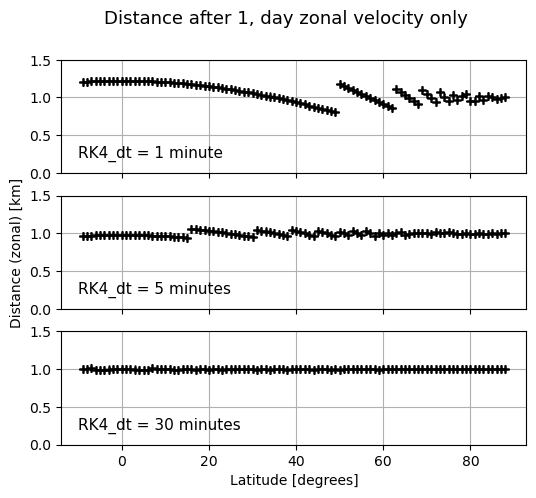

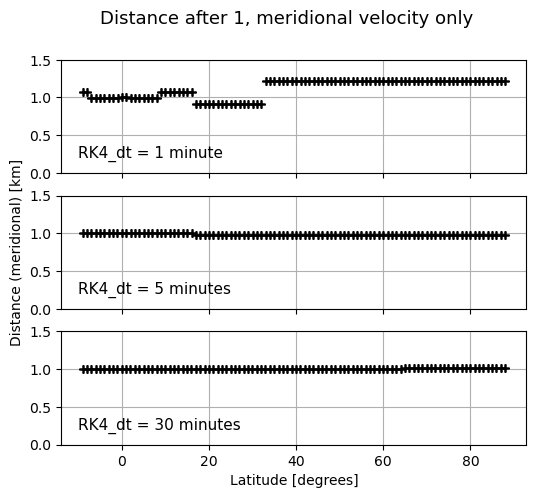

In [60]:
R_earth = 6371 #km
meter_per_degree_x = np.cos(np.array(output_data_1_1['lat'].values)*np.pi/180)*R_earth*2*np.pi/360
meter_per_degree_y = np.pi*2*R_earth/360
x = output_data_1_1['lon'].values*meter_per_degree_x
y = output_data_1_1['lat'].values*meter_per_degree_y
distance_1_1 = np.cumsum(np.sqrt(np.square(np.diff(x))+np.square(np.diff(y))),axis=1)

meter_per_degree_x = np.cos(np.array(output_data_1_5['lat'].values)*np.pi/180)*R_earth*2*np.pi/360
meter_per_degree_y = np.pi*2*R_earth/360
x = output_data_1_5['lon'].values*meter_per_degree_x
y = output_data_1_5['lat'].values*meter_per_degree_y
distance_1_5= np.cumsum(np.sqrt(np.square(np.diff(x))+np.square(np.diff(y))),axis=1)

meter_per_degree_x = np.cos(np.array(output_data_1_30['lat'].values)*np.pi/180)*R_earth*2*np.pi/360
meter_per_degree_y = np.pi*2*R_earth/360
x = output_data_1_30['lon'].values*meter_per_degree_x
y = output_data_1_30['lat'].values*meter_per_degree_y
distance_1_30 = np.cumsum(np.sqrt(np.square(np.diff(x))+np.square(np.diff(y))),axis=1)

meter_per_degree_x = np.cos(np.array(output_data_2_1['lat'].values)*np.pi/180)*R_earth*2*np.pi/360
meter_per_degree_y = np.pi*2*R_earth/360
x = output_data_2_1['lon'].values*meter_per_degree_x
y = output_data_2_1['lat'].values*meter_per_degree_y
distance_2_1 = np.cumsum(np.diff(y),axis=1)*-1

meter_per_degree_x = np.cos(np.array(output_data_2_5['lat'].values)*np.pi/180)*R_earth*2*np.pi/360
meter_per_degree_y = np.pi*2*R_earth/360
x = output_data_2_5['lon'].values*meter_per_degree_x
y = output_data_2_5['lat'].values*meter_per_degree_y
distance_2_5 = np.cumsum(np.diff(y),axis=1)*-1

meter_per_degree_x = np.cos(np.array(output_data_2_30['lat'].values)*np.pi/180)*R_earth*2*np.pi/360
meter_per_degree_y = np.pi*2*R_earth/360
x = output_data_2_30['lon'].values*meter_per_degree_x
y = output_data_2_30['lat'].values*meter_per_degree_y
print(y)
distance_2_30 = np.cumsum(np.diff(y),axis=1)*-1

fig,ax=plt.subplots(3, sharex = True, sharey= True, figsize = (6,5))
fig.suptitle("Distance after 1, day zonal velocity only", fontsize = 13)
ax[0].plot(output_data_1_1["lat"][:,0], distance_1_1[:,0],"+", c = "k")
ax[1].plot(output_data_1_5["lat"][:,0], distance_1_5[:,0],"+", c = "k")
ax[1].set(ylabel = "Distance (zonal) [km]", ylim = (0,1.5))
ax[2].plot(output_data_1_30["lat"][:,0], distance_1_30[:,0],"+", c = "k")
ax[2].set(xlabel = "Latitude [degrees]")
ax[0].grid()
ax[1].grid()
ax[2].grid()
ax[0].text(-10,0.2, "RK4_dt = 1 minute", fontsize = 11)
ax[1].text(-10,0.2, "RK4_dt = 5 minutes", fontsize = 11)
ax[2].text(-10,0.2, "RK4_dt = 30 minutes", fontsize = 11)
plt.savefig("North-Atlantic_zonal")
plt.show()

fig,ax=plt.subplots(3, sharex = True, sharey= True, figsize = (6,5))
fig.suptitle("Distance after 1, meridional velocity only", fontsize = 13)
ax[0].plot(output_data_2_1["lat"][:,0], distance_2_1[:,0],"+", c = "k")
ax[1].plot(output_data_2_5["lat"][:,0], distance_2_5[:,0],"+", c = "k")
ax[1].set(ylabel = "Distance (meridional) [km]", ylim = (0,1.5))
ax[2].plot(output_data_2_30["lat"][:,0], distance_2_30[:,0],"+", c = "k")
ax[2].set(xlabel = "Latitude [degrees]")
ax[0].grid()
ax[1].grid()
ax[2].grid()
ax[0].text(-10,0.2, "RK4_dt = 1 minute", fontsize = 11)
ax[1].text(-10,0.2, "RK4_dt = 5 minutes", fontsize = 11)
ax[2].text(-10,0.2, "RK4_dt = 30 minutes", fontsize = 11)
plt.savefig("North-Atlantic_meridional")
plt.show()

In [ ]:
plt.plot(output_data_1_1_1['lat'][:,0], distance[:,0], "+", c = "k")
plt.xlabel("latitude (degrees)")
plt.ylabel("traveled distance (km)")
plt.ylim(-0.5,1.5)
plt.title("Distance traveled after 1 day (km), run 1_1_1")
plt.grid()
plt.show()

R_earth = 6371 #km
meter_per_degree_x = np.cos(np.array(output_data_1_1_4['lat'].values)*np.pi/180)*R_earth*2*np.pi/360
meter_per_degree_y = np.pi*2*R_earth/360
x = output_data_1_1_4['lon'].values*meter_per_degree_x
y = output_data_1_1_4['lat'].values*meter_per_degree_y
distance = np.cumsum(np.sqrt(np.square(np.diff(x))+np.square(np.diff(y))),axis=1)

plt.plot(output_data_1_1_4['lat'][:,0], distance[:,0], "+", c = "k")
plt.xlabel("latitude (degrees)")
plt.ylabel("traveled distance (km)")
plt.ylim(-0.5,1.5)
plt.title("Distance traveled after 1 day (km), run 1_1_4")
plt.grid()
plt.show()


## Study area: 22N - 34N and 10W - 20W

In [ ]:
###Create appropriate grid to above study area with 1/12 deg resolution. Perform similar analysis
longitudes_SA = np.arange(-20,-10,1/12)
latitudes_SA = np.arange(22,34,1/12)
grid_SA = np.ones([len(latitudes_SA),len(longitudes_SA)])

U = U_val*grid_SA
V = 0*grid_SA
data = {'U': U, 'V': V}
dimensions = {'lon': longitudes_SA, 'lat': latitudes_SA}
fieldset_1_SA = FieldSet.from_data(data, dimensions, mesh = "spherical")

lon_list = []
lat_list = []
for lon in np.arange(-14,-12,1/4):
    for lat in np.arange(22,34,1/4):
        lon_list.append(lon)
        lat_list.append(lat)

pset_1_SA = ParticleSet.from_list(fieldset=fieldset_1_SA,   # the fields on which the particles are advected
                             pclass=JITParticle,  # the type of particles (JITParticle or ScipyParticle)
                             lon=lon_list,    # a vector of release longitudes 
                             lat=lat_list)    # a vector of release latitudes

def run_1_SA():
    T = 2 #days
    RK4_dt = 30 #minutes
    output_dt = 24 #hours
    output_file = pset_1_SA.ParticleFile(name="Output_1_SA.zarr", outputdt=timedelta(hours=output_dt)) # the file name and the time step of the outputs
    pset_1_SA.execute(AdvectionRK4,                 # the kernel (which defines how particles move)
                 runtime=timedelta(days=T),    # the total length of the run
                 dt=timedelta(minutes=RK4_dt),      # the timestep of the kernel
                 output_file=output_file)
    
    return

#run_1_SA()

output_data_1_SA = xr.open_zarr("Output_1_SA.zarr")

In [ ]:
distance_degrees_1_SA = np.cumsum(np.diff(np.array(output_data_1_SA['lon'])), axis = 1)
plt.plot(output_data_1_SA['lat'][:,0],distance_degrees_1_SA[:,0],'+',c = 'k')
plt.xlabel("latitude (degrees)")
plt.ylabel("traveled distance (degrees longitude)")
plt.ylim(-0.05,0)
plt.title("Travelled distance after 1 day (degrees longitude), run 1_SA")
plt.grid()
plt.show()

R_earth = 6371 #km
meter_per_degree_x = np.cos(np.array(output_data_1_SA['lat'].values)*np.pi/180)*R_earth*2*np.pi/360
meter_per_degree_y = np.pi*2*R_earth/360
x = output_data_1_SA['lon'].values*meter_per_degree_x
y = output_data_1_SA['lat'].values*meter_per_degree_y
distance = np.cumsum(np.sqrt(np.square(np.diff(x))+np.square(np.diff(y))),axis=1)

plt.plot(output_data_1_SA['lat'][:,0], distance[:,0], "+", c = "k")
plt.xlabel("latitude (degrees)")
plt.ylabel("traveled distance (km)")
plt.ylim(-0.5,1.5)
plt.title("Distance traveled after 1 day (km), run 1_SA")
plt.grid()
plt.show()

In [ ]:
###Compute max difference
max_difference = max(distance[:,0]) - min(distance[:,0])
print(max_difference)

- For output_dt = 24 h and RK4_dt = 5 min: 0.026367188 km
- For output_dt = 1 h and RK4_dt = 5 min: 0.026367188 km
- For output_dt = 24 h and RK4_dt = 1 min: 0.13110352 km
- For output_dt = 24 h and RK4_dt = 30 min: 0.004272461 km